In [3]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [4]:
base_dir = '/home/dsp_kass/yogesh'
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, 'val')

# Directory with our training zero pictures
train_zeros_dir = os.path.join(train_dir, '0')

# Directory with our training one pictures
train_ones_dir = os.path.join(train_dir, '1')

# Directory with our validation zero pictures
validation_zeros_dir = os.path.join(validation_dir, '0')

# Directory with our validation one pictures
validation_ones_dir = os.path.join(validation_dir, '1')

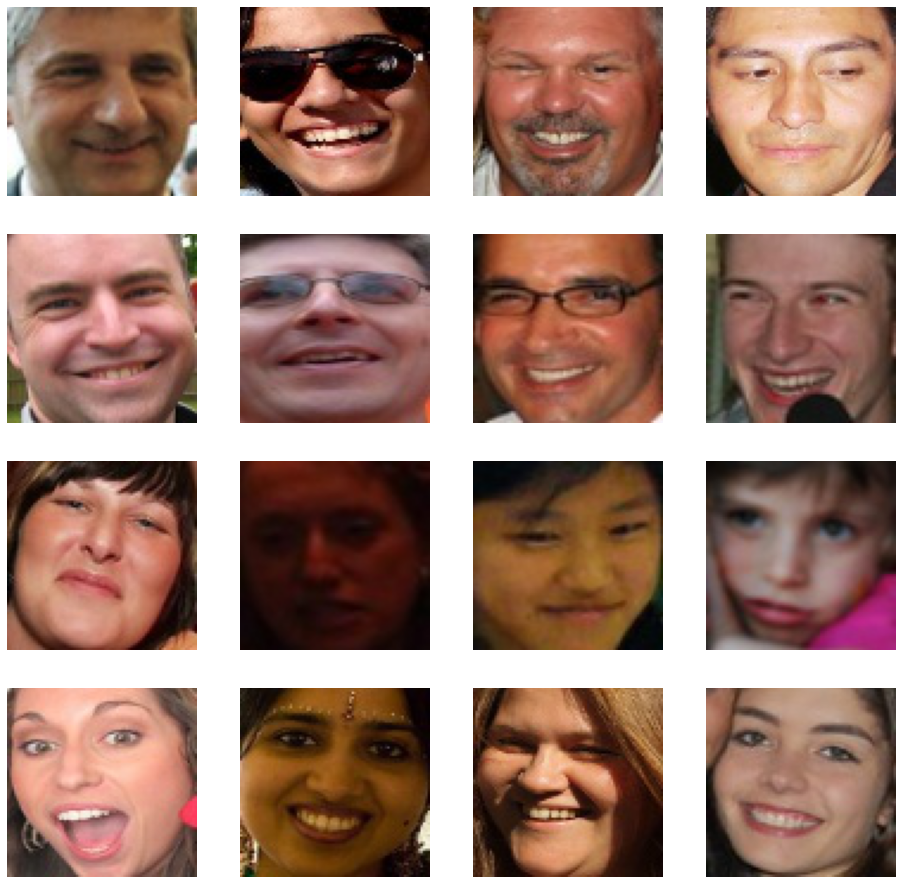

In [5]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_zero_fnames = os.listdir( validation_zeros_dir )
train_one_fnames = os.listdir( validation_one_dir )


next_zero_pix = [os.path.join(validation_zeros_dir, fname) 
                for fname in train_zero_fnames[ pic_index-8:pic_index] 
               ]

next_one_pix = [os.path.join(validation_one_dir, fname) 
                for fname in train_one_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_zero_pix+next_one_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 10, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [7]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224,224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224,224))


Found 611 images belonging to 2 classes.
Found 263 images belonging to 2 classes.


In [8]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
import efficientnet.keras as efn

base_model = efn.EfficientNetB4(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [9]:

for layer in base_model.layers:
    layer.trainable = False

In [10]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 48) 1296        input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 48) 0           stem_bn[0][0]                    
______________________________________________________________________________________________

In [ ]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 31, epochs = 10)

Epoch 1/10
31/31 [==============================] - 124s 4s/step - loss: 3.1894 - acc: 0.5946 - val_loss: 0.9378 - val_acc: 0.7110
Epoch 2/10
17/31 [===============>..............] - ETA: 36s - loss: 0.7338 - acc: 0.7506

In [ ]:
a = model.predict(validation_generator)

In [ ]:
import numpy as np
b = np.array(a.squeeze())

In [ ]:
b.astype(int)

In [ ]:
len(b)

In [1]:
!pip install efficientnet

     |████████████████████████████████| 51kB 17.1MB/s eta 0:00:01
